<a href="https://colab.research.google.com/github/NguyenHuynhNgoc20146187/AI/blob/main/cifar10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [81]:
from keras.datasets import cifar10
(x_train, y_train),(x_test, y_test) = cifar10.load_data()

In [82]:
x_train.shape

(50000, 32, 32, 3)

In [83]:
x_test.shape

(10000, 32, 32, 3)

In [84]:
y_train.shape


(50000, 1)

In [85]:
y_test.shape

(10000, 1)

Số này là: [8]


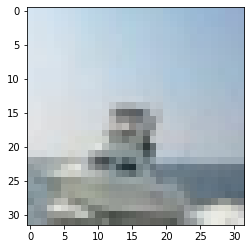

In [86]:
import matplotlib.pyplot as plt
hinh = x_train[100]
plt.imshow(hinh, cmap = plt.cm.binary)
plt.show
print('Số này là:', y_train[100])

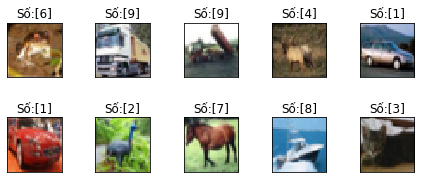

In [87]:
import matplotlib.pyplot as plt
for i in range(10):
  plt.subplot(3,5, i+1)
  plt.tight_layout()
  plt.imshow(x_train[i], cmap = 'gray', interpolation = 'none')
  plt.title('Số:{}'.format(y_train[i]))

  plt.xticks([])
  plt.yticks([])

In [88]:
from keras.engine import input_layer
#Tạo mô hình
from keras.models import Sequential
from keras.layers import Dense
model = Sequential()
model.add(Dense(512, input_shape = (32*32*3,), activation = 'relu'))
model.add(Dense(256, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(64, activation = 'relu'))
model.add(Dense(32, activation = 'relu'))
model.add(Dense(10, activation = 'relu'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_27 (Dense)            (None, 512)               1573376   
                                                                 
 dense_28 (Dense)            (None, 256)               131328    
                                                                 
 dense_29 (Dense)            (None, 128)               32896     
                                                                 
 dense_30 (Dense)            (None, 64)                8256      
                                                                 
 dense_31 (Dense)            (None, 32)                2080      
                                                                 
 dense_32 (Dense)            (None, 10)                330       
                                                                 
Total params: 1,748,266
Trainable params: 1,748,266
No

In [89]:
x_train = x_train.reshape((50000,32*32*3))
x_train = x_train.astype('float32')/255

x_test = x_test.reshape((10000,32*32*3))
x_test = x_test.astype('float32')/255

In [90]:
from keras.utils import to_categorical #Lệnh chuyển qua 
y_train = to_categorical(y_train, 10) #chuyển sang 10 kênh
y_test = to_categorical(y_test, 10)

In [91]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
model.fit(x_train, y_train, epochs = 10, batch_size= 128) # Mỗi lần học chỉ 128 dữ liệu, không học hết 60000 dữ liệu , học tổng cộng 10 lầnlần
test_loss, test_acc = model.evaluate(x_test, y_test)
print('test_accuracy:',test_acc)
print('test_loss:',test_loss)

Epoch 1/10
391/391 [==============================] - 14s 33ms/step - loss: 7.9850 - accuracy: 0.1471
Epoch 2/10
391/391 [==============================] - 13s 32ms/step - loss: 7.4120 - accuracy: 0.2007
Epoch 3/10
391/391 [==============================] - 13s 33ms/step - loss: 7.3658 - accuracy: 0.2424
Epoch 4/10
391/391 [==============================] - 14s 36ms/step - loss: 7.3507 - accuracy: 0.2669
Epoch 5/10
391/391 [==============================] - 13s 34ms/step - loss: 7.3313 - accuracy: 0.2837
Epoch 6/10
391/391 [==============================] - 13s 32ms/step - loss: 7.2912 - accuracy: 0.2979
Epoch 7/10
391/391 [==============================] - 13s 32ms/step - loss: 7.2708 - accuracy: 0.3047
Epoch 8/10
391/391 [==============================] - 13s 32ms/step - loss: 7.2591 - accuracy: 0.3076
Epoch 9/10
391/391 [==============================] - 13s 33ms/step - loss: 7.2348 - accuracy: 0.3171
Epoch 10/10
313/313 [==============================] - 2s 5ms/step - loss: 7.1769 

1/1 [==============================] - 0s 87ms/step


array([7])

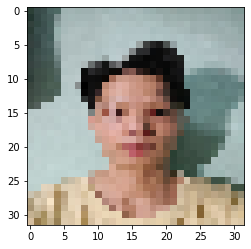

In [92]:
from keras.utils import load_img
import matplotlib.pyplot as plt

img = load_img('1.jpg',target_size=(32,32))
plt.imshow(img)

import numpy as np
from keras.utils.image_utils import img_to_array
img = img_to_array(img)
img = img.reshape(1,32*32*3)
img=img.astype('float32')
img=img/255
np.argmax(model.predict(img),axis=-1)